In [1]:
import io 
import json 
import cv2 
import numpy as np 
import requests 
import matplotlib.pyplot as plt  

In [19]:
img = cv2.imread("C://Users//Documents//Downloads/AVENA-VAINILLA-SKUs11.png")
height, width, _ = img.shape
height
width,height

(1823, 2309)

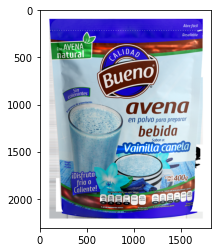

In [3]:
plt.imshow(img)

In [20]:
url_api = "https://api.ocr.space/parse/image"
_, compressedimage = cv2.imencode(".jpg", img, [1, 90])
file_bytes = io.BytesIO(compressedimage)

In [21]:
result = requests.post(url_api,
              files = {"AVENA-VAINILLA-SKUs11.jpg": file_bytes},
              data = {"apikey": "your_api_key", #you have to register on http://ocr.space/OCRAPI to get free unique api key
                      "language": "eng"})

In [22]:
result = result.content.decode()
result = json.loads(result)

In [23]:
print(result)

{'ParsedResults': [{'TextOverlay': {'Lines': [], 'HasOverlay': False, 'Message': 'Text overlay is not provided as it is not requested'}, 'TextOrientation': '0', 'FileParseExitCode': 1, 'ParsedText': 'Con AVENA\r\nnituiå12\r\nSin\r\ncolorantes\r\ne ( eoade resentaciön\r\nImagen\r\n471Disfruta\r\nfria o\r\nLCaliente!\r\nAbrefåci/\r\nRese//ab/e\r\ngueno@\r\navena\r\nen PO/VO pora preparar\r\nbebida\r\nSabora:\r\n\'CONT. n\r\nWET.\r\n"%vaso ae 250\r\nB. 3 porciones\r\n% degos•nutrimentos diarios\r\nenvase aprox.\r\napr\r\n', 'ErrorMessage': '', 'ErrorDetails': ''}], 'OCRExitCode': 1, 'IsErroredOnProcessing': False, 'ProcessingTimeInMilliseconds': '14276', 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}


In [24]:
parsed_results = result.get("ParsedResults")[0]
text_detected = parsed_results.get("ParsedText")
text_detected

'Con AVENA\r\nnituiå12\r\nSin\r\ncolorantes\r\ne ( eoade resentaciön\r\nImagen\r\n471Disfruta\r\nfria o\r\nLCaliente!\r\nAbrefåci/\r\nRese//ab/e\r\ngueno@\r\navena\r\nen PO/VO pora preparar\r\nbebida\r\nSabora:\r\n\'CONT. n\r\nWET.\r\n"%vaso ae 250\r\nB. 3 porciones\r\n% degos•nutrimentos diarios\r\nenvase aprox.\r\napr\r\n'

In [25]:
import re

In [26]:
def clean_data(text,remove_digits=False):
    pattern=r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text=re.sub(pattern,'',text)
    #text=re.sub('^ ','',text)
    #text=text.split('\r\n')
    text=re.sub('\r','',text)
    processed_text=text.replace('\\n', '\n').replace('\\t', '')
    print (processed_text)
    #return processed_text

In [27]:
clean_data(text_detected,remove_digits=False)

Con AVENA
nitui12
Sin
colorantes
e  eoade resentacin
Imagen
471Disfruta
fria o
LCaliente
Abrefci
Reseabe
gueno
avena
en POVO pora preparar
bebida
Sabora
CONT n
WET
vaso ae 250
B 3 porciones
 degosnutrimentos diarios
envase aprox
apr



In [28]:
clean_data(text_detected,remove_digits=True)

Con AVENA
nitui
Sin
colorantes
e  eoade resentacin
Imagen
Disfruta
fria o
LCaliente
Abrefci
Reseabe
gueno
avena
en POVO pora preparar
bebida
Sabora
CONT n
WET
vaso ae 
B  porciones
 degosnutrimentos diarios
envase aprox
apr

